# Numerical Exercises 12: Convolutional Neural Network

In [1]:
from MNIST_CNN import CNN
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

retrain = False

2024-06-01 19:33:20.738873: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-01 19:33:20.744015: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 19:33:20.944339: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-01 19:33:21.747163: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-01 19:33:26.301975: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF

In this second exercise I am going to change type the type of network used to classify the hand-written digits. In particular I am going to use a convolutional neural network. These type of network are particularly suited to attack problems where the concept of locality is import, for example the recognition of common patterns in images (exactly the problem we are dealing with); to do this they implement different types of layers, in particular `Conv2D`, `Pooling` and `Flatten`, which work as follows:

- `Conv2D`: this layer represent a series of filters which are "translated" (convoluted) across the 2D input data
- `Pooling`: this layer is used to coarse-grain data by applying a specified type of sub-sampling
- `Flatten`: is used to unroll the multi-dimensional data on which the previous layers operate in order to use it as the input of a standard dense layer.

After some tests, I identified a good CNN for this problem composed as follows:

- `Conv2D`, 6 filters
- `MaxPooling`
- `Conv2D, 16 filters`
- `MaxPooling`
- `Flatten`
- `Dense`, `relu` activation, 256 neurons
- `Dropout`
- `Dense`, `softmax` activation, 10 neurons

I then trained the network for only $5$ epochs, just to roughly evaluate its prediction abilities.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - acc: 0.9770 - loss: 0.0722

Test loss: 0.05841011181473732
Test accuracy: 0.9812999963760376


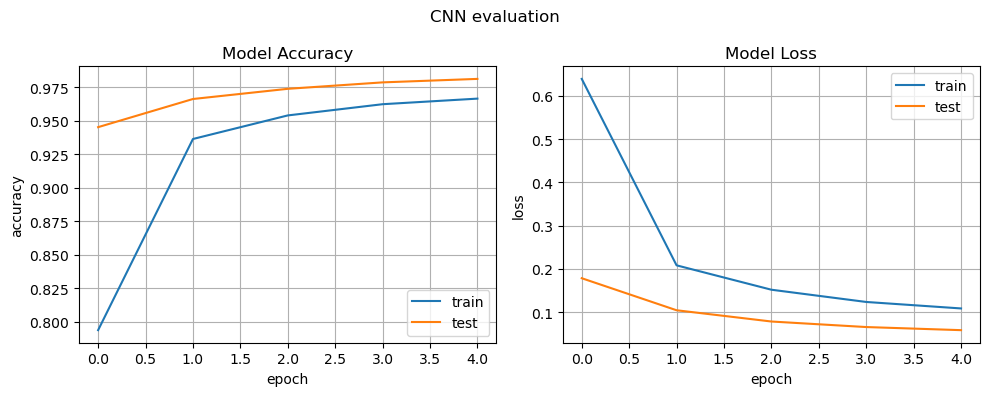

In [8]:
model_CNN = CNN(32, 5)
(score, history) = (None, None)

model_filename = './CNN.keras'
hist_filename = './hist.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_CNN.train_CNN()
    model_CNN.save_model()

else:

    model_CNN.load_model()
    (score, history) = model_CNN.evaluate_CNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.suptitle("CNN evaluation")
plt.tight_layout()
plt.show()

sgd_score = score                   # I will need this later

The CNN behaves better, after only 5 epochs, than the DNN  from the previous exercise trained for 15 epochs: this is a huge improvement, also considering that the network hasn't converged yet. 

In [3]:
print(model_CNN.model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 70,936 (277.10 KB)

 Trainable params: 70,934 (277.09 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None


I will now try to change optimizer again, with the same procedure and the same trial optimizers as in Exercise 12.2.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...

Test loss: 0.039145004004240036
Test accuracy: 0.9887999892234802
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step
Completed: 1/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...

Test loss: 0.03541823476552963
Test accuracy: 0.9883999824523926
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Completed: 2/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...

Test loss: 2.0690553188323975
Test accuracy: 0.47850000858306885
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step
Completed: 3/4
X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28

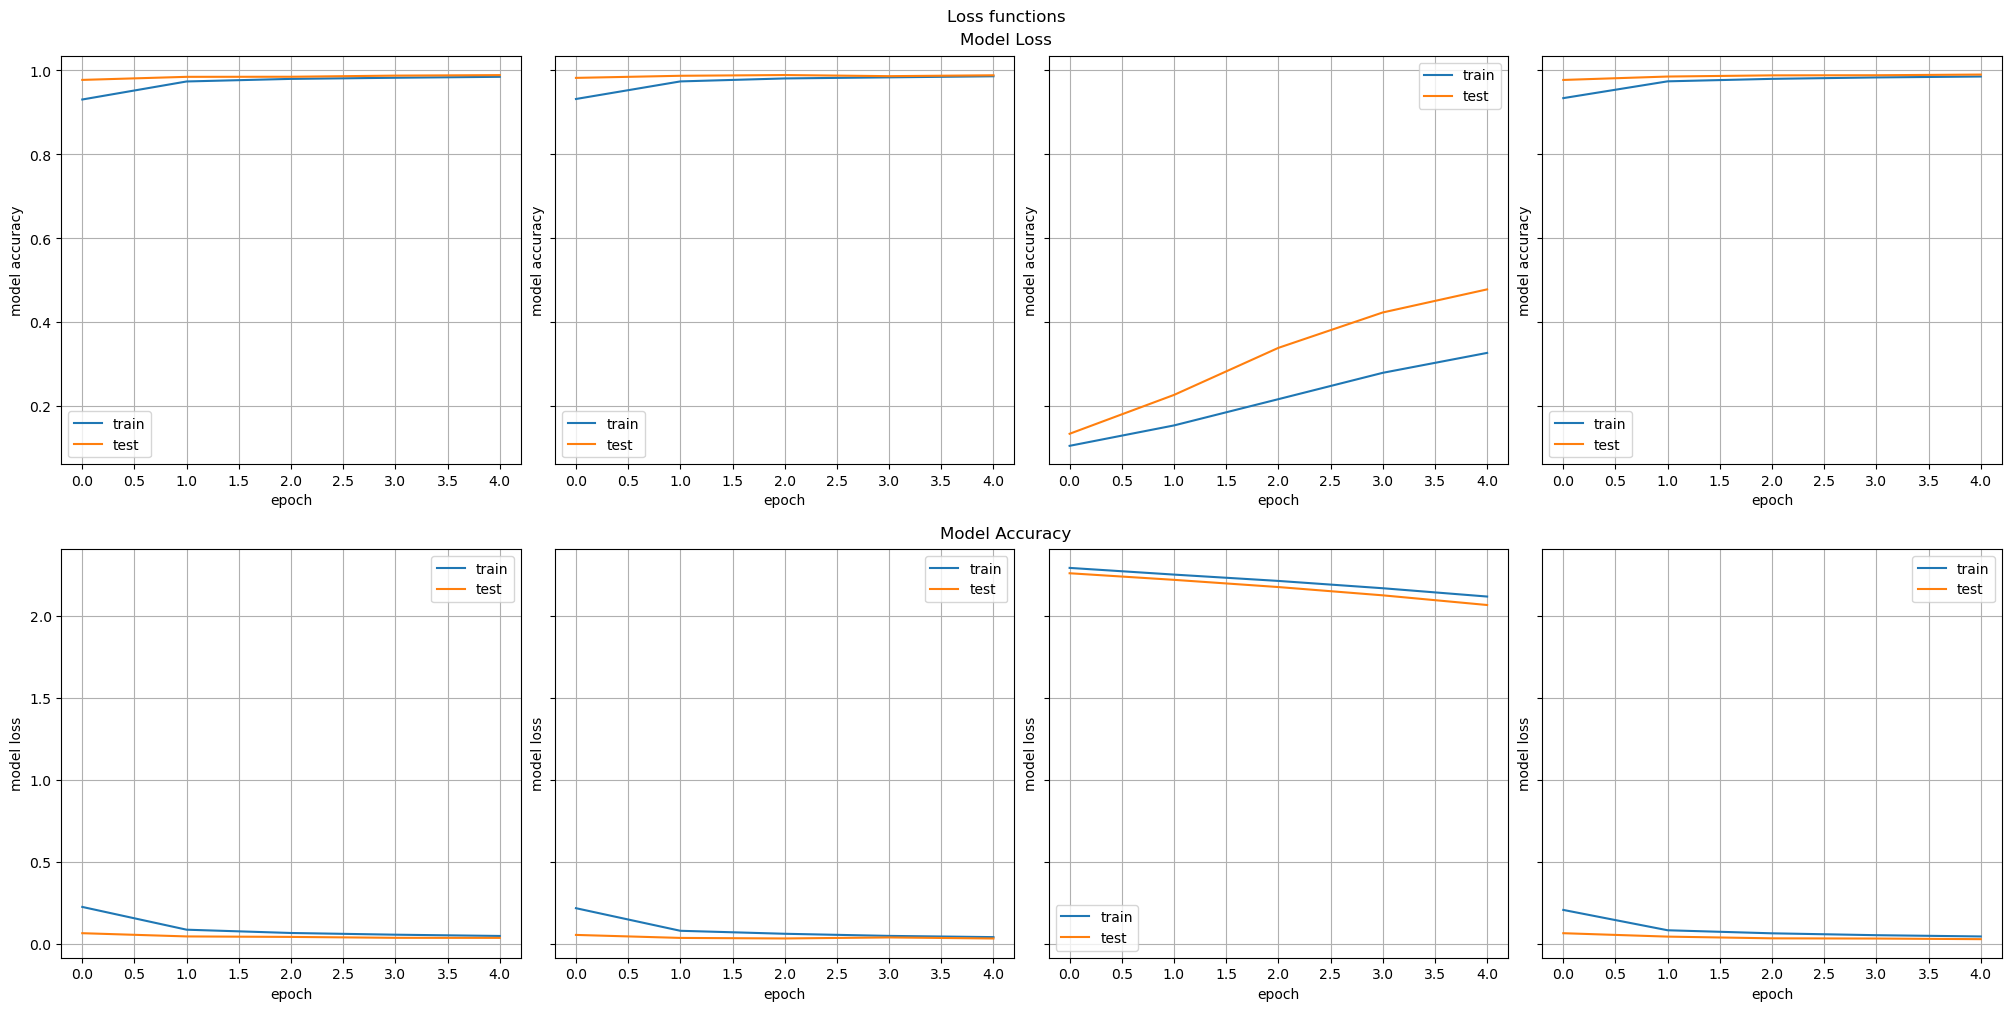

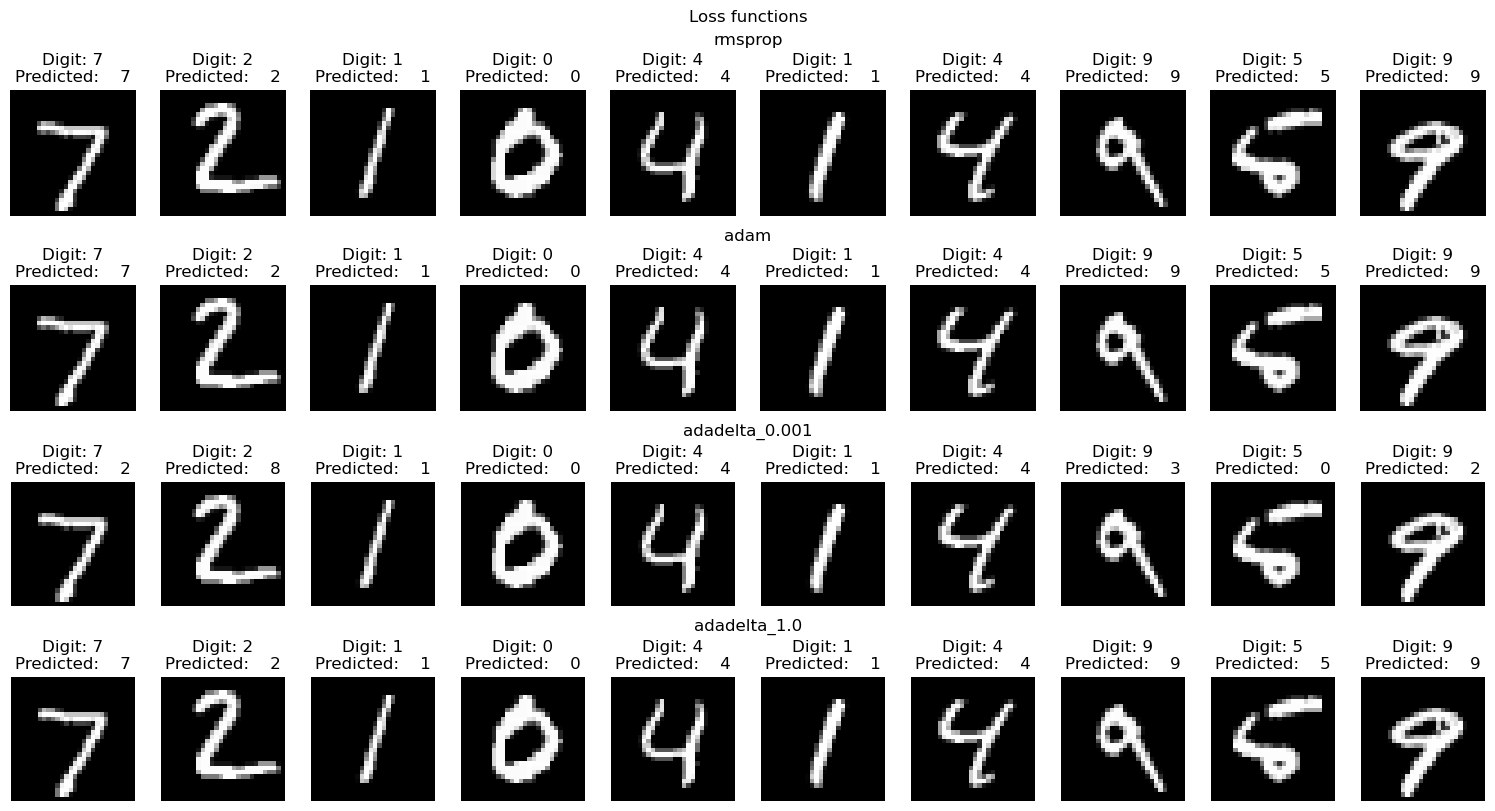

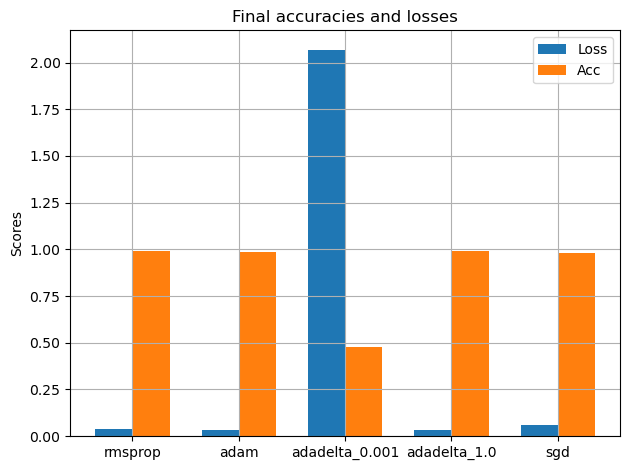

In [7]:
Optimizers = [RMSprop(), Adam(), Adadelta(), Adadelta(learning_rate = 1.0)] 
Optimizers_Str = ['rmsprop', 'adam', 'adadelta_0.001', 'adadelta_1.0'] 

Titles = ["Model Loss", "Model Accuracy"]

figure_train = plt.figure(constrained_layout=True)
figure_train.suptitle("Loss functions")
figure_train.set_size_inches(20, 10)

subfigs_train = figure_train.subfigures(nrows=2, ncols=1)
ax_train = []

for idx, subfig in enumerate(subfigs_train):

    subfig.suptitle(Titles[idx])
    ax_train.append(subfig.subplots(1, len(Optimizers), sharey = 'row'))

figure_pred = plt.figure(constrained_layout=True)
figure_pred.suptitle("Loss functions")
figure_pred.set_size_inches(15, 8)

subfigs_pred = figure_pred.subfigures(nrows=len(Optimizers), ncols=1)
ax_pred = []

for idx, subfig in enumerate(subfigs_pred):

    subfig.suptitle(Optimizers_Str[idx])
    ax_pred.append(subfig.subplots(1, 10, sharey = 'row'))

path = './OptimizerCmp/'

Accuracies = []
Losses = []

for idx, Optimizer in enumerate(Optimizers):

    model_filename = path + 'CNN_' + Optimizers_Str[idx] + ".keras"
    hist_filename = path + 'hist_' + Optimizers_Str[idx] + ".npy"

    model_CNN = CNN(32, 5, Optimizer, False)
    (score, history) = (None, None)

    if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

        (score, history) = model_CNN.train_CNN()
        model_CNN.save_model(model_filename, hist_filename)

    else:

        model_CNN.load_model(model_filename, hist_filename)
        (score, history) = model_CNN.evaluate_CNN()

    ax_acc = ax_train[0][idx]
    ax_loss = ax_train[1][idx]

    # summarize history for accuracy
    ax_acc.plot(history.history['acc'])
    ax_acc.plot(history.history['val_acc'])
    ax_acc.set_ylabel('model accuracy')
    ax_acc.set_xlabel('epoch')
    ax_acc.legend(['train', 'test'], loc='best')
    ax_acc.grid(True)

    # summarize history for loss
    ax_loss.plot(history.history['loss'])
    ax_loss.plot(history.history['val_loss'])
    ax_loss.set_ylabel('model loss')
    ax_loss.set_xlabel('epoch')
    ax_loss.legend(['train', 'test'], loc='best')
    ax_loss.grid(True)

    predictions = model_CNN.CNN_predict()
    X_test = model_CNN.X_test.reshape(model_CNN.X_test.shape[0], model_CNN.img_rows, model_CNN.img_cols, 1)

    for i in range(10):    
        ax = ax_pred[idx][i]    
        ax.imshow(X_test[i, :, :, 0], cmap='gray')    
        ax.set_title("Digit: {}\nPredicted:    {}".format(np.argmax(model_CNN.Y_test[i]), np.argmax(predictions[i])))    
        ax.axis('off') 

    print("Completed: {}/{}".format(idx + 1, len(Optimizers)))

    Losses.append(score[0])
    Accuracies.append(score[1])

plt.show()

#add sgd data
Losses.append(sgd_score[0])
Accuracies.append(sgd_score[1])
Optimizers_Str.append('sgd')

x = np.arange(len(Optimizers_Str))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Losses, width, label='Loss')
rects2 = ax.bar(x + width/2, Accuracies, width, label='Acc')

# Add some text for Optimizers_Str, title and custom x-axis tick Optimizers_Str, etc.
ax.set_ylabel('Scores')
ax.set_title('Final accuracies and losses')
ax.set_xticks(x)
ax.set_xticklabels(Optimizers_Str)
ax.legend()
ax.grid(True)
fig.tight_layout()

plt.show()

Again, the best optimizer is given by `adadelta` with a learning rate of $1.0$. I may also stress that using a CNN the final performance is indeed exceptional, with an accuracy of $0.99$ and a loss of $0.03$, which is a huge improvement if compared with the best performance of a DNN network (even after a larger number of epochs).

As a last step, I will train the tweaked network for a larger number of epochs, $N_{Epoch} = 15$.

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000,)

60000 train samples
10000 test samples
Loading pre-trained model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - acc: 0.9867 - loss: 0.0435

Test loss: 0.03403177857398987
Test accuracy: 0.989300012588501


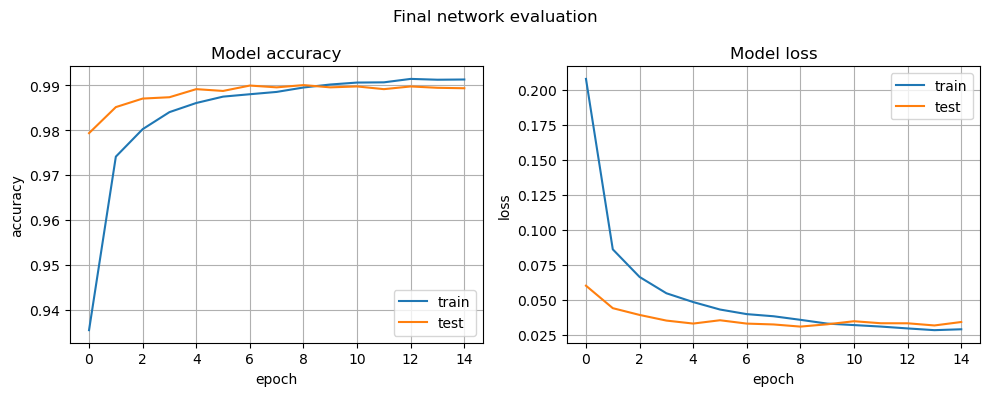

In [9]:
model_CNN = CNN(32, 15, Adadelta(learning_rate = 1.0))
(score, history) = (None, None)

model_filename = './CNN_final.keras'
hist_filename = './hist_final.npy'

if((not os.path.isfile(model_filename) or not os.path.isfile(hist_filename)) and not retrain):

    (score, history) = model_CNN.train_CNN()
    model_CNN.save_model(model_filename, hist_filename)

else:

    model_CNN.load_model(model_filename, hist_filename)
    (score, history) = model_CNN.evaluate_CNN()

# look into training history

plt.figure().set_size_inches(10, 4)

# summarize history for accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.grid(True)

plt.suptitle("Final network evaluation")
plt.tight_layout()
plt.show()

As a final note, I may say that $15$ training epochs may already be an exaggerated value, since the network has already reached convergence after around $10$ epochs; anyway, since lowering the number of epochs of $5$ does not drastically change the execution time, I decided to leave it as is.